In [1]:
import csv 

def read_file(path):
    f = open(path, encoding='utf-8')
    file_reader = csv.reader(f)
    data = list(file_reader)
    f.close()
    return data

def get_mapping(path):
    data = read_file(path)
    dic = {}
    for row in data:
        key = row[0]
        val = row[1]
        dic[key] = val
    return dic    

In [2]:
#q1
small_mapping = get_mapping("small_mapping.csv")
small_mapping

{'nm0000131': 'John Cusack',
 'nm0000154': 'Mel Gibson',
 'nm0000163': 'Dustin Hoffman',
 'nm0000418': 'Danny Glover',
 'nm0000432': 'Gene Hackman',
 'nm0000997': 'Gary Busey',
 'nm0001149': 'Richard Donner',
 'nm0001219': 'Gary Fleder',
 'nm0752751': 'Mitchell Ryan',
 'tt0313542': 'Runaway Jury',
 'tt0093409': 'Lethal Weapon'}

In [3]:
#q2
small_mapping['nm0752751']

'Mitchell Ryan'

In [4]:
#what are the values in the 
#mapping associated with keys 
#beginning with "nm"?
l = []
for key in small_mapping:
    if key[:2] == "nm":
        l.append(small_mapping[key])
l   

['John Cusack',
 'Mel Gibson',
 'Dustin Hoffman',
 'Danny Glover',
 'Gene Hackman',
 'Gary Busey',
 'Richard Donner',
 'Gary Fleder',
 'Mitchell Ryan']

In [5]:
#q4
r = []
for key in small_mapping:
    if small_mapping[key][:5] == "Gary ":
        r.append(key)
r

['nm0000997', 'nm0001219']

In [6]:
import csv

f_file = open('small_movies.csv', encoding='utf-8')
f_reader = csv.reader(f_file)
m_data = list(f_reader)
f_file.close()
header = m_data[0]
m_data = m_data[1:]

print(header)
for row in m_data[:5]:
    print(row)
    

['title', 'year', 'rating', 'directors', 'actors', 'genres']
['tt0313542', '2003', '7.1', 'nm0001219', 'nm0000131,nm0000432,nm0000163', 'Crime,Drama,Thriller']
['tt0093409', '1987', '7.6', 'nm0001149', 'nm0000154,nm0000418,nm0000997,nm0752751', 'Action,Crime,Thriller']


In [7]:
#q5
def get_raw_movies(path):
    data = read_file(path)
    movie_list = []
    header = data[0]
    data = data[1:]
    for row in data:
        dic = {}
        for i in range(len(header)):
            if 'title' == header[i]:
                dic[header[i]] = row[i]
            elif 'year' == header[i]:
                row[i] = int(row[i])
                dic[header[i]] = row[i]
            elif 'rating' == header[i]:
                row[i] = float(row[i])
                dic[header[i]] = row[i]
            else:
                dic[header[i]] = row[i].split(",")
        movie_list += [dic]
    return movie_list  

small_movies = get_raw_movies("small_movies.csv")
small_movies

[{'title': 'tt0313542',
  'year': 2003,
  'rating': 7.1,
  'directors': ['nm0001219'],
  'actors': ['nm0000131', 'nm0000432', 'nm0000163'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'tt0093409',
  'year': 1987,
  'rating': 7.6,
  'directors': ['nm0001149'],
  'actors': ['nm0000154', 'nm0000418', 'nm0000997', 'nm0752751'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [8]:
#q6
len(small_movies[0]['genres'])

3

In [9]:
#q7
small_movies[1]['actors'][-1]

'nm0752751'

In [10]:
def get_movies(movie_file, mapping_file):
    movies = get_raw_movies(movie_file)
    mapping = get_mapping(mapping_file)
    for movie in movies:
        title_id = movie['title']
        title = mapping[title_id]
        movie['title'] = title
        actors = movie['actors']
        for i in range(len(actors)):
            actors_id = actors[i]
            actors_name = mapping[actors_id]
            actors[i] = actors_name
        directors = movie['directors']
        for i in range(len(directors)):
            directors_id = directors[i]
            directors_name = mapping[directors_id]
            directors[i] = directors_name
    return movies
small = get_movies("small_movies.csv", "small_mapping.csv")
small

[{'title': 'Runaway Jury',
  'year': 2003,
  'rating': 7.1,
  'directors': ['Gary Fleder'],
  'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'Lethal Weapon',
  'year': 1987,
  'rating': 7.6,
  'directors': ['Richard Donner'],
  'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [11]:
small = get_movies("small_movies.csv", "small_mapping.csv")
small

[{'title': 'Runaway Jury',
  'year': 2003,
  'rating': 7.1,
  'directors': ['Gary Fleder'],
  'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'Lethal Weapon',
  'year': 1987,
  'rating': 7.6,
  'directors': ['Richard Donner'],
  'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [12]:
#q8
small[0]["title"]

'Runaway Jury'

In [13]:
#q9
small[1]["actors"]

['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan']

In [14]:
#q10
small[-1]["directors"]

['Richard Donner']

In [15]:
#q11
small

[{'title': 'Runaway Jury',
  'year': 2003,
  'rating': 7.1,
  'directors': ['Gary Fleder'],
  'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'Lethal Weapon',
  'year': 1987,
  'rating': 7.6,
  'directors': ['Richard Donner'],
  'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [16]:
movies = get_movies("movies.csv", "mapping.csv")

In [17]:
#q12
movies[0:3]

[{'title': 'The Big Wedding',
  'year': 2013,
  'rating': 5.6,
  'directors': ['Justin Zackham'],
  'actors': ['Robert De Niro'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Affair of the Necklace',
  'year': 2001,
  'rating': 6.1,
  'directors': ['Charles Shyer'],
  'actors': ['Simon Baker', 'Jonathan Pryce', 'Adrien Brody'],
  'genres': ['Drama', 'History', 'Romance']},
 {'title': 'The Barefoot Executive',
  'year': 1971,
  'rating': 6.0,
  'directors': ['Robert Butler'],
  'actors': ['Kurt Russell', 'Joe Flynn', 'Harry Morgan', 'Wally Cox'],
  'genres': ['Comedy', 'Family']}]

In [18]:
#q13
movies[-3:]

[{'title': 'Fortitude and Glory: Angelo Dundee and His Fighters',
  'year': 2012,
  'rating': 7.2,
  'directors': ['Chris Tasara'],
  'actors': ['Angelo Dundee', 'George Foreman', 'Freddie Roach'],
  'genres': ['Sport']},
 {'title': 'Ivanhoe',
  'year': 1952,
  'rating': 6.8,
  'directors': ['Richard Thorpe'],
  'actors': ['Robert Taylor', 'George Sanders'],
  'genres': ['Adventure', 'Drama', 'History']},
 {'title': 'The Great Gatsby',
  'year': 1949,
  'rating': 6.6,
  'directors': ['Elliott Nugent'],
  'actors': ['Alan Ladd', 'Macdonald Carey'],
  'genres': ['Drama']}]

In [19]:
#what are the movies from 1931?
def filter_movies_by_year(movies, year):
    i = 0
    while i < len(movies):
        if movies[i]["year"] != year:
            movies.pop(i)
        else:
            i += 1
    return movies
filter_movies_by_year(movies.copy(), 1931)

In [20]:
#q14
filter_movies_by_year(movies.copy(), 1931)

[{'title': 'Arizona',
  'year': 1931,
  'rating': 6.0,
  'directors': ['George B. Seitz'],
  'actors': ['John Wayne', 'Forrest Stanley'],
  'genres': ['Drama', 'Romance']},
 {'title': 'City Lights',
  'year': 1931,
  'rating': 8.5,
  'directors': ['Charles Chaplin'],
  'actors': ['Charles Chaplin', 'Harry Myers'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Range Feud',
  'year': 1931,
  'rating': 5.8,
  'directors': ['D. Ross Lederman'],
  'actors': ['Buck Jones', 'John Wayne', 'Edward LeSaint'],
  'genres': ['Mystery', 'Western']}]

In [21]:
#q15
filter_movies_by_year(movies.copy(), 1932)

[{'title': 'Texas Cyclone',
  'year': 1932,
  'rating': 6.2,
  'directors': ['D. Ross Lederman'],
  'actors': ['Wallace MacDonald', 'Tim McCoy', 'Wheeler Oakman', 'John Wayne'],
  'genres': ['Action', 'Western']},
 {'title': 'Haunted Gold',
  'year': 1932,
  'rating': 5.5,
  'directors': ['Mack V. Wright'],
  'actors': ['Otto Hoffman',
   'John Wayne',
   'Duke',
   'Harry Woods',
   'Erville Alderson'],
  'genres': ['Horror', 'Mystery', 'Western']},
 {'title': 'Girl Crazy',
  'year': 1932,
  'rating': 6.3,
  'directors': ['William A. Seiter'],
  'actors': ['Bert Wheeler', 'Robert Woolsey', 'Eddie Quillan'],
  'genres': ['Comedy']},
 {'title': 'Hot Saturday',
  'year': 1932,
  'rating': 6.6,
  'directors': ['William A. Seiter'],
  'actors': ['Cary Grant', 'Randolph Scott', 'Edward Woods'],
  'genres': ['Drama', 'Romance']},
 {'title': 'Lady and Gent',
  'year': 1932,
  'rating': 5.7,
  'directors': ['Stephen Roberts'],
  'actors': ['Morgan Wallace',
   'George Bancroft',
   'Charles St

In [22]:
#how many unique genres are 
#there in the dataset?
def get_unique(key):
    i = 0
    output = []
    while i < len(movies):
        movies_values =movies[i][key]  
        for item in movies_values:
            if item not in output:
                output.append(item)
            else:
                continue
        i +=1
                
    return len(output)
get_unique("genres")

In [23]:
#q16
get_unique("genres")

18

In [24]:
#q17
get_unique("directors")

1247

In [25]:
def highest_number_actors():
    highest_number = 0
    ans = None
    i=0
    while i < len(movies):
        movies_actors = len(movies[i]["actors"])
        if highest_number < movies_actors:
            highest_number = movies_actors
            ans = movies[i]['title']
        i += 1
    return ans

In [26]:
#q18
highest_number_actors()

'Shoulder Arms'

In [27]:
#what is the average movie rating?
def average_rating():
    i = 0
    output = []
    while i < len(movies):
        movies_rating = float(movies[i]['rating'])
        output.append(movies_rating)
        
        i +=1
                
    return sum(output)/len(output)
average_rating()

In [28]:
#q19
average_rating()

6.401659528907912

In [29]:
#what is the longest movie 
#title in the dataset 
#(in terms of most characters)?
def longest_movie_title():
    i = 0
    output = []
    longest_title = 0 
    ans = None
    while i < len(movies):
        movies_title = movies[i]['title']
        title_number = len(movies_title)
        if longest_title < title_number:
            longest_title = title_number
        i += 1
    for i in movies:
        if len(i['title']) == longest_title:
            return i['title']

In [30]:
#q20
longest_movie_title()

'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb'

In [31]:
test_movies = [
{"title": "A", "year": 2018, "style": "short", "genres": ["g1"]},
{"title": "B", "year": 2018, "style": "long",  "genres": ["g2"]},
{"title": "C", "year": 2019, "style": "short", "genres": ["g3"]},
{"title": "D", "year": 2019, "style": "long", "genres": ["g1", "g2", "g3"]},
]

In [63]:
#this is test_movies data set
#what is bucketize(test_movies, "year")?
def bucketize(movie_list, movie_key):
    bucketized_dict = {}
    
    for movie in test_movies:
        if type(movie[movie_key]) is not list:
            if movie[movie_key] in bucketized_dict:
                bucketized_dict[movie[movie_key]].append(movie)
            else:
                bucketized_dict[movie[movie_key]] = [movie]

        else:
            for items in movie[movie_key]:
                if items in bucketized_dict:
                    bucketized_dict[items].append(movie)
                else:
                    bucketized_dict[items] = [movie]

                
    return bucketized_dict
bucketize(test_movies, "year")

{2018: [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']}],
 2019: [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [34]:
#q21
bucketize(test_movies, "year")

{2018: [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']}],
 2019: [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [35]:
#q22
bucketize(test_movies, "style")

{'short': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']}],
 'long': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [36]:
#q23
bucketize(test_movies, "genres")

{'g1': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g2': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g3': [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [37]:
def bucketize(movie_list, movie_key):
    bucketized_dict = {}
    
    for movie in small:
        if type(movie[movie_key]) is not list:
            if movie[movie_key] in bucketized_dict:
                bucketized_dict[movie[movie_key]].append(movie)
            else:
                bucketized_dict[movie[movie_key]] = [movie]

        else:
            for items in movie[movie_key]:
                if items in bucketized_dict:
                    bucketized_dict[items].append(movie)
                else:
                    bucketized_dict[items] = [movie]

                
    return bucketized_dict

In [38]:
#q24
bucketize(small,"genres")

{'Crime': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
   'genres': ['Action', 'Crime', 'Thriller']}],
 'Drama': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']}],
 'Thriller': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson',

In [39]:
#q25
len(bucketize(small,"actors"))

7

In [40]:
def bucketize(movie_list, movie_key):
    bucketized_dict = {}
    
    for movie in movies:
        if type(movie[movie_key]) is not list:
            if movie[movie_key] in bucketized_dict:
                bucketized_dict[movie[movie_key]].append(movie)
            else:
                bucketized_dict[movie[movie_key]] = [movie]

        else:
            for items in movie[movie_key]:
                if items in bucketized_dict:
                    bucketized_dict[items].append(movie)
                else:
                    bucketized_dict[items] = [movie]

                
    return bucketized_dict

In [41]:
#q26
len(bucketize(movies,"actors"))

2605

In [42]:
#q27
def bucketize_3(movies, col_name):
    buckets = {}
    for bucket in movies:
        first = bucket[col_name]
        if type(first) != list:
            if not first in buckets:
                buckets[first] = 1
            else:
                buckets[first] += 1
        else:
            for items in first:
                if not items in buckets:
                    buckets[items] = 1
                else:
                    buckets[items] += 1
            
    return buckets

bucket_1 = bucketize_3(movies, "genres")
bucket_1

{'Comedy': 485,
 'Drama': 1094,
 'Romance': 352,
 'History': 73,
 'Family': 85,
 'Mystery': 121,
 'Thriller': 250,
 'Action': 299,
 'Crime': 357,
 'Adventure': 283,
 'Western': 226,
 'Music': 38,
 'Animation': 45,
 'Sport': 48,
 'Fantasy': 59,
 'War': 99,
 'Sci-Fi': 69,
 'Horror': 85}

In [43]:
%matplotlib inline

In [44]:
import matplotlib, pandas

def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

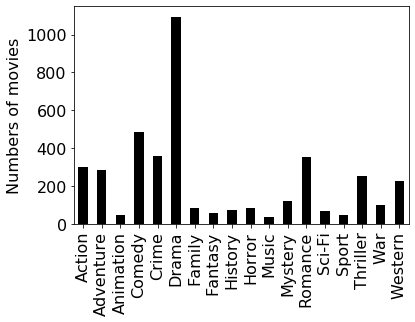

In [45]:
#q28
plot_dict(bucket_1,"Numbers of movies")

In [46]:
def filter_year(movies, year1, year2):
    i = 0
    result = []
    while i < len(movies):
        year = movies[i]["year"]
        if year1 != None and year < year1:
            i += 1
            continue
        if year2 != None and year > year2:
            i += 1
            continue
        result.append(movies[i])
        i += 1
    return result

In [47]:
def bucket_counts(movies_list,col_name):
    buckets = {}
    for bucket in movies_list:
        first = bucket[col_name]
        if type(first) != list:
            if not first in buckets:
                buckets[first] = 1
            else:
                buckets[first] += 1
        else:
            for items in first:
                if not items in buckets:
                    buckets[items] = 1
                else:
                    buckets[items] += 1
            
    return buckets

result1 = bucket_counts(filter_year(movies, None, 1999), "genres")

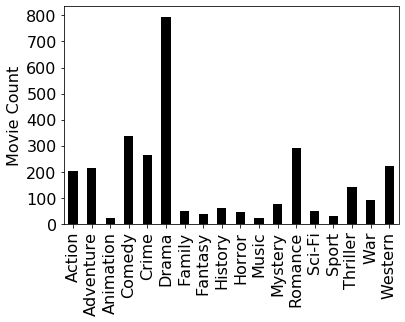

In [48]:
#q29
plot_dict(result1, "Movie Count")

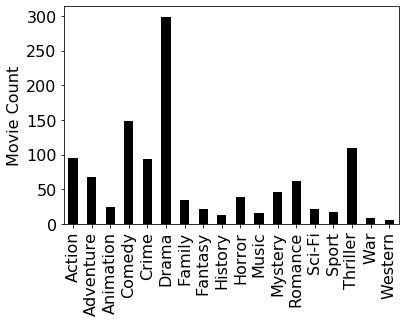

In [49]:
#q30
plot_dict(bucket_counts(filter_year(movies, 2000, None), "genres"), "Movie Count")

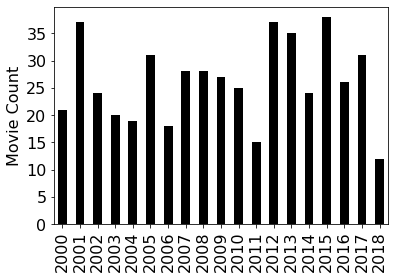

In [50]:
#q31
plot_dict(bucket_counts(filter_year(movies, 2000, None), "year"), "Movie Count")

In [51]:
def career_span(movies, col_name, min_year):
    directors_dic = bucketize(movies,col_name)
    span = {}
    for key in directors_dic:
        year_min = None
        year_max = None
        for dic in directors_dic[key]:
            year = dic["year"]
            if year_min is None or year < year_min:
                year_min = year
            if year_max is None or year > year_max:
                year_max = year
        if year_max - year_min >= min_year:
            span[key] = year_max - year_min
    return span

In [52]:
#q32
career_span(movies, "directors", 30)

{'Howard Hawks': 42,
 'Charles Chaplin': 34,
 'Henry Hathaway': 36,
 'Stanley Kubrick': 46,
 'Taylor Hackford': 32,
 'Cecil B. DeMille': 30,
 'Lee H. Katzin': 30,
 'Richard Fleischer': 32,
 'Sidney Lumet': 33,
 'George Sherman': 33,
 'John Huston': 30,
 'Robert Siodmak': 30,
 'Eldar Ryazanov': 31,
 'Martin Ritt': 32}

In [53]:
#q33
career_span(movies, "actors", 50)

{'Kurt Russell': 50,
 'Mickey Rooney': 75,
 'Robert Mitchum': 51,
 'Glenn Ford': 52,
 'James Caan': 52,
 'Anthony Quinn': 61,
 'George Burns': 60,
 'Dean Stockwell': 53}

In [54]:
def row_ranking(row):
    return row["span"]

def top_n_span(buckets, n):
    spans = career_span(movies, buckets, 0)
    rows = []
    for name in spans:
        span = spans[name]
        rows.append({"name": name, "span": span})

    
    rows.sort(key=row_ranking, reverse=True)

    return rows[:n]

In [55]:
#q34
top_n_span("directors", 10)

[{'name': 'Stanley Kubrick', 'span': 46},
 {'name': 'Howard Hawks', 'span': 42},
 {'name': 'Henry Hathaway', 'span': 36},
 {'name': 'Charles Chaplin', 'span': 34},
 {'name': 'Sidney Lumet', 'span': 33},
 {'name': 'George Sherman', 'span': 33},
 {'name': 'Taylor Hackford', 'span': 32},
 {'name': 'Richard Fleischer', 'span': 32},
 {'name': 'Martin Ritt', 'span': 32},
 {'name': 'Eldar Ryazanov', 'span': 31}]

In [56]:
#q35
top_n_span("actors", 10)

[{'name': 'Mickey Rooney', 'span': 75},
 {'name': 'Anthony Quinn', 'span': 61},
 {'name': 'George Burns', 'span': 60},
 {'name': 'Dean Stockwell', 'span': 53},
 {'name': 'Glenn Ford', 'span': 52},
 {'name': 'James Caan', 'span': 52},
 {'name': 'Robert Mitchum', 'span': 51},
 {'name': 'Kurt Russell', 'span': 50},
 {'name': 'Robert De Niro', 'span': 49},
 {'name': 'Marlon Brando', 'span': 49}]

In [57]:
def bucketize_rating(movie_list, movie_key):
    bucketized_dict = {}
    
    for movie in movies:
        if type(movie[movie_key]) is not list:
            if movie[movie_key] in bucketized_dict:
                bucketized_dict[movie[movie_key]].append(movie["rating"])
            else:
                bucketized_dict[movie[movie_key]] = [movie["rating"]]

        else:
            for items in movie[movie_key]:
                if items in bucketized_dict:
                    bucketized_dict[items].append(movie["rating"])
                else:
                    bucketized_dict[items] = [movie["rating"]]

                
    return bucketized_dict

In [58]:
rating = bucketize_rating(movies,"genres")
for i in rating:
    sorted(rating[i])

In [59]:
from statistics import median
med = dict()
for i in rating:
    med[i] = median(rating[i])
med

{'Comedy': 6.3,
 'Drama': 6.6,
 'Romance': 6.5,
 'History': 6.7,
 'Family': 6.6,
 'Mystery': 6.3,
 'Thriller': 6.0,
 'Action': 6.2,
 'Crime': 6.4,
 'Adventure': 6.6,
 'Western': 6.4,
 'Music': 6.4,
 'Animation': 7.3,
 'Sport': 6.4,
 'Fantasy': 6.5,
 'War': 6.7,
 'Sci-Fi': 6.1,
 'Horror': 5.7}

In [60]:
import operator

def top_genre(buckets, n, category):
    bucket_sorted = sorted(buckets.items(), key=operator.itemgetter(1), reverse=True)
    x = []
    bucket_1 = bucketize_3(movies, category)
    for i in bucket_sorted:
        x.append({"category": i[0], "rating": i[1], "count": bucket_1[i[0]]})
    return x[:n]

In [61]:
#q36
top_genre(med, 3, "genres")

[{'category': 'Animation', 'rating': 7.3, 'count': 45},
 {'category': 'History', 'rating': 6.7, 'count': 73},
 {'category': 'War', 'rating': 6.7, 'count': 99}]

In [62]:
#q37
bucket = bucketize_rating(movies, "year")
med = {}
for i in bucket:
    med[i] = median(bucket[i])
top_genre(med, 10, "year")

[{'category': 1921, 'rating': 8.3, 'count': 1},
 {'category': 1925, 'rating': 8.2, 'count': 1},
 {'category': 1919, 'rating': 7.5, 'count': 1},
 {'category': 1923, 'rating': 7.3, 'count': 2},
 {'category': 1962, 'rating': 7.2, 'count': 17},
 {'category': 1964, 'rating': 7.1, 'count': 19},
 {'category': 1957, 'rating': 7.0, 'count': 24},
 {'category': 1985, 'rating': 7.0, 'count': 17},
 {'category': 1976, 'rating': 7.0, 'count': 17},
 {'category': 1963, 'rating': 6.95, 'count': 10}]